In [52]:
!pip install Sastrawi

In [53]:
!pip install Wordcloud

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn. feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS

---
# 1. Masukan Data
---



In [55]:
data = pd.read_csv('/content/labeled_anies.csv')
data.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,label,sentiment,score
0,Thu Dec 07 11:44:36 +0000 2023,1732727809351778665,"@rmol_id Kasihan org ini, karena sangat dengki...",0,0,0,0,in,1624008535649697793,1732688208063053847,YahyaAlkatiri31,https://twitter.com/YahyaAlkatiri31/status/173...,NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.999606549739...",0.999607
1,Thu Dec 07 11:44:06 +0000 2023,1732727683220750591,@Resty_J_Cayah @prabowo Oh kader dari partai l...,0,0,0,0,in,4859508591,1732663910657052759,Gunawanpark,https://twitter.com/Gunawanpark/status/1732727...,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.994717538356...",0.994718
2,Thu Dec 07 11:44:03 +0000 2023,1732727669694087356,Massa yg menyambut Anies di bandara Kuala Namu...,0,0,0,0,in,1630034258944303104,1732727669694087356,SulbenSiagian,https://twitter.com/SulbenSiagian/status/17327...,NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.957452952861...",0.957453
3,Thu Dec 07 11:43:49 +0000 2023,1732727612018180465,@yaniarsim @aniesbaswedan Pak Anies membawa pe...,0,0,0,1,in,1719314157307375616,1732697347531173936,kalilaaaq20,https://twitter.com/kalilaaaq20/status/1732727...,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999830245971...",0.999830
4,Thu Dec 07 11:43:38 +0000 2023,1732727565243252941,"belajar Hil, biar bsk bisa 🥹😔🫥 kitabisa com Hi...",0,0,0,1,in,1317084070468177920,1732727565243252941,NurilHiLma2022,https://twitter.com/NurilHiLma2022/status/1732...,NEGATIVE,"[{'label': 'NEGATIVE', 'score': 0.982446908950...",0.982447


In [56]:
data = data[['full_text', 'label']]
data.head()

,full_text,label
0,"@rmol_id Kasihan org ini, karena sangat dengki...",NEGATIVE
1,@Resty_J_Cayah @prabowo Oh kader dari partai l...,POSITIVE
2,Massa yg menyambut Anies di bandara Kuala Namu...,NEGATIVE
3,@yaniarsim @aniesbaswedan Pak Anies membawa pe...,POSITIVE
4,"belajar Hil, biar bsk bisa 🥹😔🫥 kitabisa com Hi...",NEGATIVE


In [57]:
data.drop_duplicates(inplace=True)

In [58]:
data.duplicated().sum()

0

In [59]:
data.describe()

,full_text,label
count,1828,1828
unique,1828,2
top,"@rmol_id Kasihan org ini, karena sangat dengki...",POSITIVE
freq,1,1202


---
# 2. Pre processing
---

In [79]:
data['full_text'] = data['full_text'].str.lower()
data['label'] = data['label'].str.lower()
data.head()

,full_text,label
0,id kasihan orang sangat dengki pak anies sampe...,negative
1,jcayah kader partai dukung anies dong benar,positive
2,massa menyambut anies bandara kuala namu medan...,negative
3,pak anies membawa perubahan harapan rakyat,positive
4,belajar hil biar bsk kitabisa com hilma nuril ...,negative


In [80]:
norm = {" dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus ', 'org':'orang', 'yg':' yang '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['full_text'] = data['full_text'].apply(lambda x: normalisasi(x))
data.head()

,full_text,label
0,id kasihan orang sangat dengki pak anies sampe...,negative
1,jcayah kader partai dukung anies dong benar,positive
2,massa menyambut anies bandara kuala namu medan...,negative
3,pak anies membawa perubahan harapan rakyat,positive
4,belajar hil biar bsk kitabisa com hilma nuril ...,negative


In [81]:
def preprocess_text(text):
    # Remove Twitter handles
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # Remove links
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the preprocessing function to the 'full_text' column
data['full_text'] = data['full_text'].apply(preprocess_text)

In [82]:
# Stopword
import Sastrawi
from Sastrawi. StopWordRemover. StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = []
stop_words = StopWordRemoverFactory ().get_stop_words ()
new_array = ArrayDictionary (stop_words)
stop_words_remover_new = StopWordRemover (new_array)
def stopword (str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text
data[ 'full_text'] = data['full_text'].apply(lambda x: stopword (x))
data.head()

,full_text,label
0,id kasihan orang sangat dengki pak anies sampe...,negative
1,jcayah kader partai dukung anies dong benar,positive
2,massa menyambut anies bandara kuala namu medan...,negative
3,pak anies membawa perubahan harapan rakyat,positive
4,belajar hil biar bsk kitabisa com hilma nuril ...,negative


In [83]:
tokenized = data['full_text'].apply(lambda x:x.split())
tokenized

0       [id, kasihan, orang, sangat, dengki, pak, anie...
1       [jcayah, kader, partai, dukung, anies, dong, b...
2       [massa, menyambut, anies, bandara, kuala, namu...
3       [pak, anies, membawa, perubahan, harapan, rakyat]
4       [belajar, hil, biar, bsk, kitabisa, com, hilma...
                              ...                        
1892    [jokowi, belajar, anies, lebih, memahami, arti...
1893    [sesuai, dugaan, pendukung, pendukung, anies, ...
1894    [ketua, badan, pemenangan, pemilu, bappilu, pa...
1895    [btw, gua, ga, dibayar, buzzer, pak, anies, be...
1896    [alonely, pas, anies, menang, malah, ngumpet, ...
Name: full_text, Length: 1828, dtype: object

In [84]:
# Stemming
from Sastrawi. Stemmer.StemmerFactory import StemmerFactory
def stemming (text_cleaning):
  factory = StemmerFactory ()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem (w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print (d_clean)
  return d_clean
tokenized = tokenized.apply(stemming)
tokenized.to_csv('/content/cleaned_anies', index=False)

id kasihan orang sangat dengki pak anies sampe lihat goblok
jcayah kader partai dukung anies dong benar
massa sambut anies bandara kuala namu medan tak kendali
pak anies bawa ubah harap rakyat
ajar hil biar bsk kitabisa com hilma nuril th diagnosa cerebral hypoton panjang umur baik marapi banjir hujan asam sulfat jakarta u bcl raffi mega chindo gempa rohingya hamas gemoy prabowo palestin anies ganjar gibran gaza
hebat mas anies jd inget omong salah satu cucu dr pahlawan nasional beliau diksh rmh mas anies atas jasa kakek pahlawan nasional saat semua jabat pikir perut beliau pikir soal juang bangsa
andriana maksud fahri apa anies jadi dewan duluatau kader partai dulu nya sendiri gitu
kata siapa bakal stop jangan cuma judul dipake liat apa kata pak anies bukan cuma kata si buat judul
alhamdulillah sempat buat duduk paling depan pas acara desak anies wkwk walaupun pas mau nanya ga tunjuk terus
lalu rawat fakir miskin tingkat sejahtera masyarakat bukan atur uu anies pernah blg tolak bukan 

KeyboardInterrupt: ignored

In [85]:
data_clean = pd.read_csv('/content/cleaned_anies')
data_clean.head()

,full_text
0,id kasihan orang sangat dengki pak anies sampe...
1,jcayah kader partai dukung anies dong benar
2,massa sambut anies bandara kuala namu medan ta...
3,pak anies bawa ubah harap rakyat
4,ajar hil biar bsk kitabisa com hilma nuril th ...


In [92]:
at1 = pd.read_csv('/content/cleaned_anies')
at2 = pd.read_csv('/content/labeled_anies.csv')
att2 = at2 ['label']
data_clean = pd.concat([at1, att2], axis=1)
data_clean.head()

,full_text,label
0,id kasihan orang sangat dengki pak anies sampe...,NEGATIVE
1,jcayah kader partai dukung anies dong benar,POSITIVE
2,massa sambut anies bandara kuala namu medan ta...,NEGATIVE
3,pak anies bawa ubah harap rakyat,POSITIVE
4,ajar hil biar bsk kitabisa com hilma nuril th ...,NEGATIVE


In [101]:
data_clean = data_clean.dropna()

,full_text,label
0,id kasihan orang sangat dengki pak anies sampe...,0
1,jcayah kader partai dukung anies dong benar,1
2,massa sambut anies bandara kuala namu medan ta...,0
3,pak anies bawa ubah harap rakyat,1
4,ajar hil biar bsk kitabisa com hilma nuril th ...,0
...,...,...
1823,jokowi ajar anies lebih paham arti sejati demo...,0
1824,sesuai duga dukung dukung anies ahok elitis,1
1825,ketua badan menang milu bappilu partai nasdem ...,1
1826,btw gua ga bayar buzzer pak anies bener ngiri ...,1


In [94]:
data_clean = data_clean.replace({ 'POSITIVE':1, 'NEGATIVE':0})
data_clean.head()

,full_text,label
0,id kasihan orang sangat dengki pak anies sampe...,0
1,jcayah kader partai dukung anies dong benar,1
2,massa sambut anies bandara kuala namu medan ta...,0
3,pak anies bawa ubah harap rakyat,1
4,ajar hil biar bsk kitabisa com hilma nuril th ...,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# 3. Visualisasi Kata

In [95]:
data_negatif = data_clean[data_clean['label'] == 0]
data_positif = data_clean[data_clean['label'] == 1]

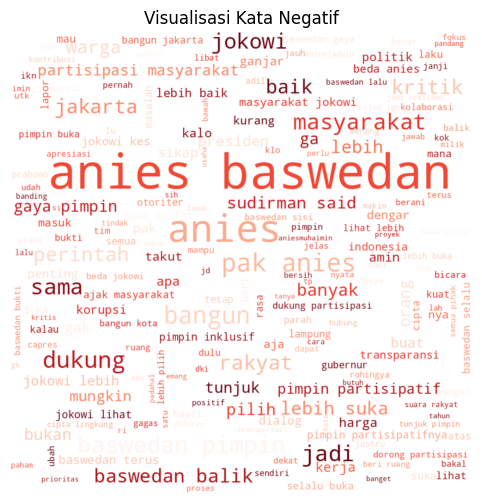

In [96]:
all_text_s0 = ' '.join(word for word in data_negatif ["full_text"])
wordcloud = WordCloud (colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate (all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow (wordcloud, interpolation='bilinear')
plt.axis ('off')
plt.title("Visualisasi Kata Negatif")
plt.margins (x=0, y=0)
plt.show()

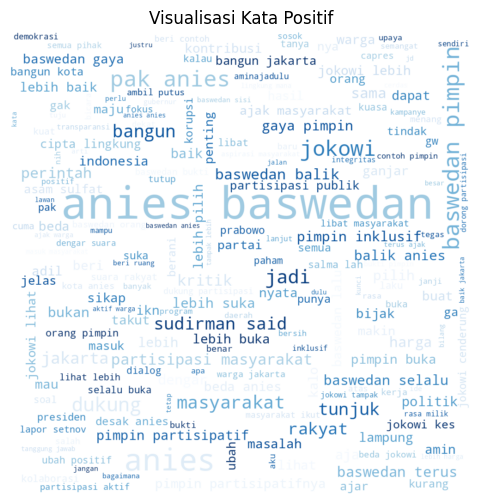

In [104]:
all_text_s0 = ' '.join(word for word in data_positif ["full_text"])
wordcloud = WordCloud (colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate (all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow (wordcloud, interpolation='bilinear')
plt.axis ('off')
plt.title("Visualisasi Kata Positif")
plt.margins (x=0, y=0)
plt.show()

In [105]:
data_clean['label'].value_counts()

1    1190
0     638
Name: label, dtype: int64

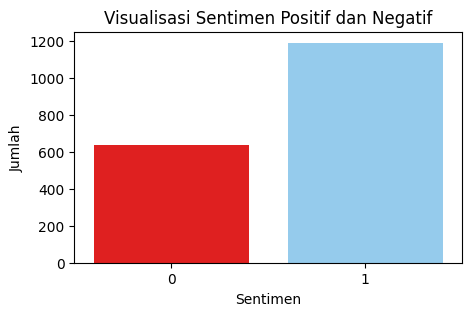

In [108]:
# Visualisasi sentimen positif dan negatif
plt.figure(figsize=(5, 3))
sns.countplot (data=data_clean, x='label', palette={0: "red", 1: "lightskyblue"})
plt.title('Visualisasi Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# 4. Data Preparation

In [154]:
# Memisahkan data menjadi data latih dan data uji
X = data_clean[ 'full_text' ]
y = data_clean['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [155]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform (X_train)
X_test_vec = vectorizer.transform (X_test)

In [146]:
# Melakukan oversampling menggunakan SMOTE pada data latih
smote = SMOTE (random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample (X_train_vec, y_train)

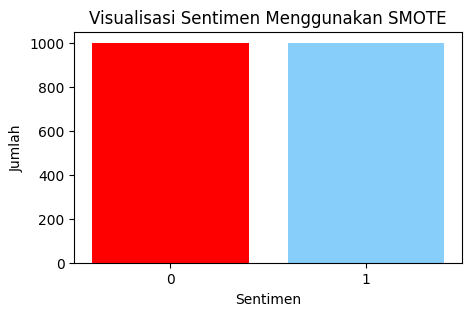

In [113]:
# Contoh data hasil resampling (terserah Anda harus mengganti dengan data yang sesuai)
sentimen_counts = y_train_resampled.value_counts()
plt.figure(figsize=(5, 3))
plt.bar (sentimen_counts.index, sentimen_counts.values, color=['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen Menggunakan SMOTE')
plt.xticks (sentimen_counts.index, ['0', '1'])
plt.show()

# 5. Modeling

In [156]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

MultinomialNB()

In [157]:
y_pred = naive_bayes.predict (X_test_vec)

In [158]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report (y_test, y_pred, target_names=['negatif', 'positif'])
print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.6763636363636364

Laporan Klasifikasi :
               precision    recall  f1-score   support

     negatif       0.43      0.19      0.26        84
     positif       0.71      0.89      0.79       191

    accuracy                           0.68       275
   macro avg       0.57      0.54      0.53       275
weighted avg       0.63      0.68      0.63       275



## 6. Testing

In [159]:
new_text=input("\nMasukkan teks baru: ")
new_text_vec = vectorizer.transform( [new_text])
predicted_sentimen = naive_bayes.predict (new_text_vec)
if predicted_sentimen[0] == 1:
    sentiment_label = "positif"
elif predicted_sentimen [0] == 0:
    sentiment_label = "negatif"
print("Hasil Analisis Sentimen untuk Teks Baru :", sentiment_label)


Masukkan teks baru: Maksud fahri apa Anies harus jadi dewan dulu...atau kader partai dulu? Dia nya sendiri juga masih gitu
Hasil Analisis Sentimen untuk Teks Baru : negatif
